# Tier 1 Lab: Hooke's law and Oscillations, 0 degree case

In [46]:
import numpy as np
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import interp1d
np.set_printoptions(threshold=np.inf)

Here we're just importing all the data, each of the time_1, force_1, position_1, ... are NumPy arrays that contain the time, force, and position data for each trial according to their numbers (For instance, time_1 refers to the time array for trial 1).

In [47]:
time_1, force_1, position_1 = np.loadtxt('0degrun1.csv', delimiter = ',', skiprows = 1, usecols = (0, 1, 2), unpack = True)
time_2, force_2, position_2 = np.loadtxt('0degrun2.csv', delimiter = ',', skiprows = 1, usecols = (0, 1, 2), unpack = True)
time_3, force_3, position_3 = np.loadtxt('0degrun3.csv', delimiter = ',', skiprows = 1, usecols = (0, 1, 2), unpack = True)
time_4, force_4, position_4 = np.loadtxt('0degrun4.csv', delimiter = ',', skiprows = 1, usecols = (0, 1, 2), unpack = True)
time_5, force_5, position_5 = np.loadtxt('0degrun5.csv', delimiter = ',', skiprows = 1, usecols = (0, 1, 2), unpack = True)
time_6, force_6, position_6 = np.loadtxt('0degrun6.csv', delimiter = ',', skiprows = 1, usecols = (0, 1, 2), unpack = True)

time_6 = time_6[force_6 < 0] #See lab report for why I do this
position_6 = position_6[force_6 < 0]
force_6 = force_6[force_6 < 0]

# print(time_6)

force_1 = np.array(force_1)
force_2 = np.array(force_2)
force_3 = np.array(force_3)
force_4 = np.array(force_4)
force_5 = np.array(force_5)
force_6 = np.array(force_6)

position_1 = np.array(position_1)
position_2 = np.array(position_2)
position_3 = np.array(position_3)
position_4 = np.array(position_4)
position_5 = np.array(position_5)
position_6 = np.array(position_6)


Here's a sample plot of the first trial. I'm not going to do all six trials, but the variables are basically the same.

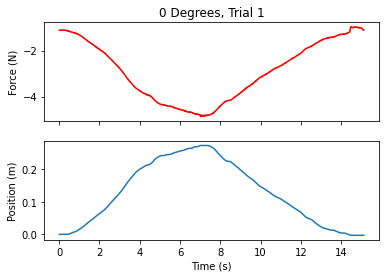

In [48]:
f, axarr = plt.subplots(2, sharex = True)
axarr[0].plot(time_1, force_1,'r')
axarr[0].set_title('0 Degrees, Trial 1')
axarr[0].set_ylabel('Force (N)')
axarr[1].plot(time_1, position_1)
axarr[1].set_xlabel('Time (s)')
axarr[1].set_ylabel('Position (m)')
plt.show()

This plot is useful for showing us that we've grabbed the files properly, but it's not very useful in terms of doing analysis. What we need to do then is to plot force vs. distance, then calculate the slope of the plot. Calculating the slope will give us the spring constant, which is the thing we want. Here's a plot of data set 1, plotting position against force:

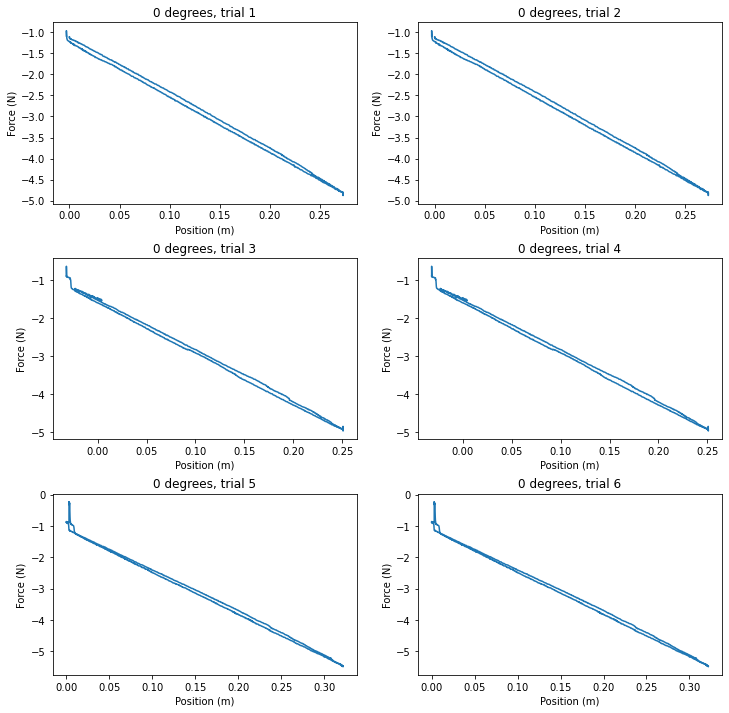

In [49]:
f1, axes1 = plt.subplots(3, 2, figsize = (12, 12))
plt.subplots_adjust(hspace = 0.3)
data_counter= 1
title_counter = 1
for i in range(3):
    for j in range(2):
        axes1[i, j].plot(vars()["position_" + str(data_counter)], vars()["force_" + str(data_counter)])
        axes1[i, j].set_title(f"0 degrees, trial {title_counter}")
        axes1[i, j].set_ylabel("Force (N)")
        axes1[i, j].set_xlabel("Position (m)")
        title_counter +=1
    data_counter +=1

plt.show()

In [50]:
def linear(m, x, b):
    return m*x +b

In [51]:
lin_opt_1, lin_cov_1 = opt.curve_fit(linear, position_1, force_1)

slope_1, y_int_1 = lin_opt_1
dslope_1, dy_int_1 = np.sqrt(np.diag(lin_cov_1))

print("m = %5.4f \u00b1 %5.4f" % (slope_1, dslope_1))
print("c = %5.4f \u00b1 %5.4f" % (y_int_1, dy_int_1))

m = -13.3255 ± 0.0155
c = -1.1579 ± 0.0025


We can plot this line of best fit against the force vs. position data to see what our plots look like:

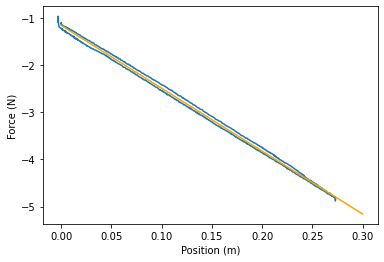

In [52]:
x_values = np.linspace(0, 0.3, 100)
y_values = slope_1*x_values + y_int_1

f3, axes = plt.subplots(3, 2, figsize = (12, 12))

plt.plot(position_1, force_1)
plt.plot(x_values, y_values, c = 'orange')
plt.xlabel("Position (m)")
plt.ylabel("Force (N)")
plt.show()

Calculating the slopes for the other ones too, then we store them all in an array:

In [53]:
lin_opt_2, lin_cov_2 = opt.curve_fit(linear, position_2, force_2)
slope_2, y_int_2 = lin_opt_2
dslope_2, dy_int_2 = np.sqrt(np.diag(lin_cov_2))

lin_opt_3, lin_cov_3 = opt.curve_fit(linear, position_3, force_3)
slope_3, y_int_3 = lin_opt_3
dslope_3, dy_int_3 = np.sqrt(np.diag(lin_cov_3))

lin_opt_4, lin_cov_4 = opt.curve_fit(linear, position_4, force_4)
slope_4, y_int_4 = lin_opt_4
dslope_4, dy_int_4 = np.sqrt(np.diag(lin_cov_4))

lin_opt_5, lin_cov_5 = opt.curve_fit(linear, position_5, force_5)
slope_5, y_int_5 = lin_opt_5
dslope_5, dy_int_5 = np.sqrt(np.diag(lin_cov_5))

lin_opt_6, lin_cov_6 = opt.curve_fit(linear, position_6, force_6)
slope_6, y_int_6 = lin_opt_6
dslope_6, dy_int_6 = np.sqrt(np.diag(lin_cov_6))

slopes = [slope_1, slope_2, slope_3, slope_4, slope_5, slope_6]
y_ints = [y_int_1, y_int_2, y_int_3, y_int_4, y_int_5, y_int_6]

dslopes = [dslope_1, dslope_2, dslope_3, dslope_4, dslope_5, dslope_6]
dy_ints = [dy_int_1, dy_int_2, dy_int_3, dy_int_4, dy_int_5, dy_int_6]

average_slope = np.mean(slopes)

#Calculating the uncertianties for the average slope in quadrature:
sum_dyints = 0
for i in range(len(dy_ints)):
    sum_dyints += dy_ints[i]**2

d_average_slope = np.sqrt(sum_dyints)

print(f"Average slope: {average_slope} N/m")
print(f"Uncertainty in average slope: {d_average_slope} N/m")

Average slope: -13.650686880931351 N/m
Uncertainty in average slope: 0.020101162309827583 N/m


Notice that this value for the slope is negative. We expect this, since our theorized relationsihp between force and position is $F = -kx$. Since the $k$ has a negative sign on it, then we expect a negative value from our plots. This means that we get a spring constant of $13.74\pm 0.01 \frac{N}{m}$. 

# Residual plotting

For the residuals, I'm going to plot each of them separately. Then, I'll show a graph that has the residual plots for each of the data.

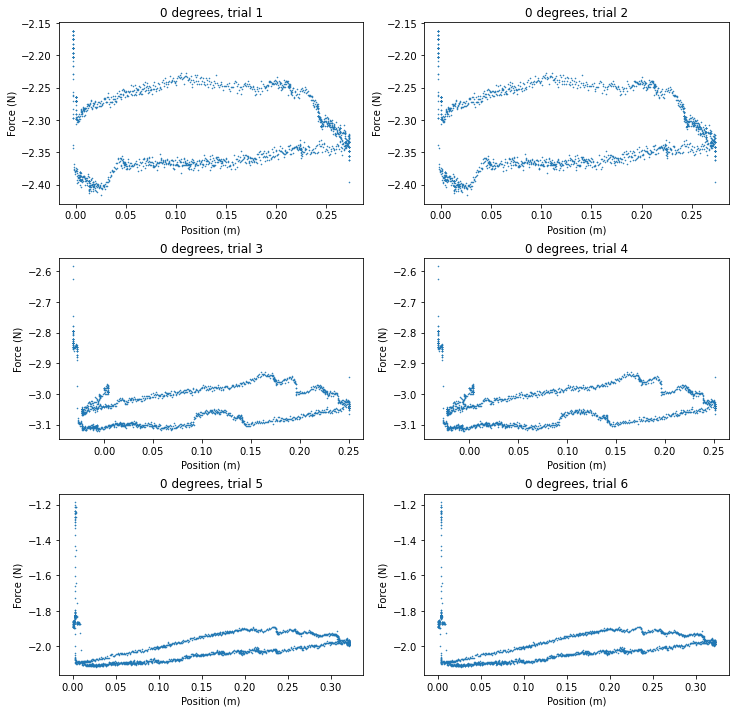

In [54]:
def residuals (y_actual, x_actual, slope, y_int):
    return y_actual - slope*x_actual + y_int

#Calculating the residuals for each plot
for element in range(len(position_1)):
    res_1 = residuals(force_1, position_1, slope_1, y_int_1)
    res_2 = residuals(force_2, position_2, slope_2, y_int_2)
    res_3 = residuals(force_3, position_3, slope_3, y_int_3)
    res_4 = residuals(force_4, position_4, slope_4, y_int_4)
    res_5 = residuals(force_5, position_5, slope_5, y_int_5)
    res_6 = residuals(force_6, position_6, slope_6, y_int_6)
    

f2, axes = plt.subplots(3, 2, figsize = (12, 12))
plt.subplots_adjust(hspace = 0.3)

data_counter= 1
title_counter = 1
for i in range(3):
    for j in range(2):
        axes[i, j].scatter(vars()["position_" + str(data_counter)], vars()["res_" + str(data_counter)], s = 0.3)
        axes[i, j].set_title(f"0 degrees, trial {title_counter}")
        axes[i, j].set_ylabel("Force (N)")
        axes[i, j].set_xlabel("Position (m)")
        title_counter +=1
    data_counter +=1

plt.show()